<a href="https://colab.research.google.com/github/Vanshree005/FUTURE_ML_02/blob/main/ML_2_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/AAPL.csv',index_col="Date",parse_dates=True)
#data cleaning
dataset.isna().any()

#Featurescaling normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset)

X_train = training_set_scaled[:, :-1]
y_train = training_set_scaled[:, -1]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#feature extration, building RNN LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#training neural network
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


326/326 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0022
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0021
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0020
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0020
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0019
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0019
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0021
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0020
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0020
Epoch 13/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0023
Epoch 14/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0020
Epoch 15/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step -

In [4]:
#!wet  https://www.dropbox.com/s/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as  tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *

from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure
import warnings
from bokeh.models import  Legend

warnings.filterwarnings("ignore")

a_st= pd.read_csv('/content/AAPL.csv',index_col="Date",parse_dates=True)
a_st.head()

low_column = a_st['Low']
print(low_column)

scaler = MinMaxScaler(feature_range=(0,1))
low_column = scaler.fit_transform(np.array(low_column).reshape(-1,1))
out=[]
for i in range(100,low_column.size):
  out.append(low_column[i-100:i,0])

low_column = a_st['Low']





Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2022-03-18    159.759995
2022-03-21    163.009995
2022-03-22    164.910004
2022-03-23    167.649994
2022-03-24    170.210007
Name: Low, Length: 10409, dtype: float64
Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2022-03-18    159.759995
2022-03-21    163.009995
2022-03-22    164.910004
2022-03-23    167.649994
2022-03-24    170.210007
Name: Low, Length: 10409, dtype: float64


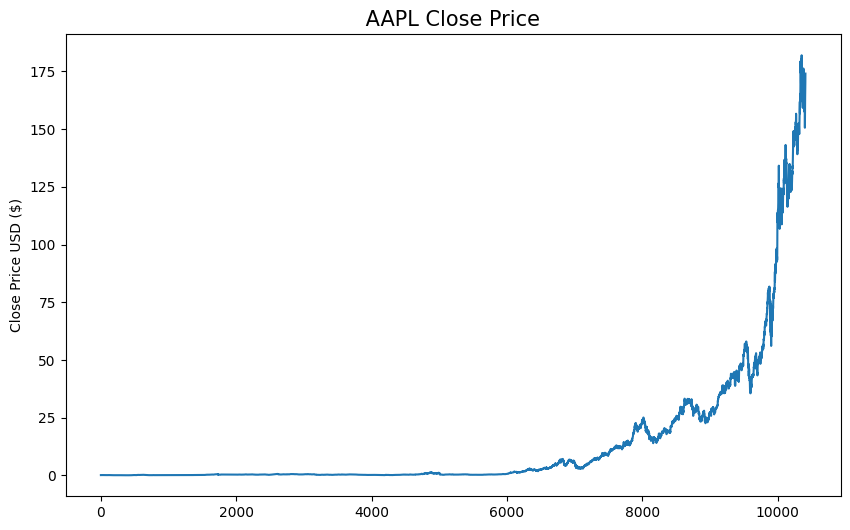

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/AAPL.csv')

plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.title(' AAPL Close Price ',fontsize=15)

plt.ylabel('Close Price USD ($)')
plt.show()



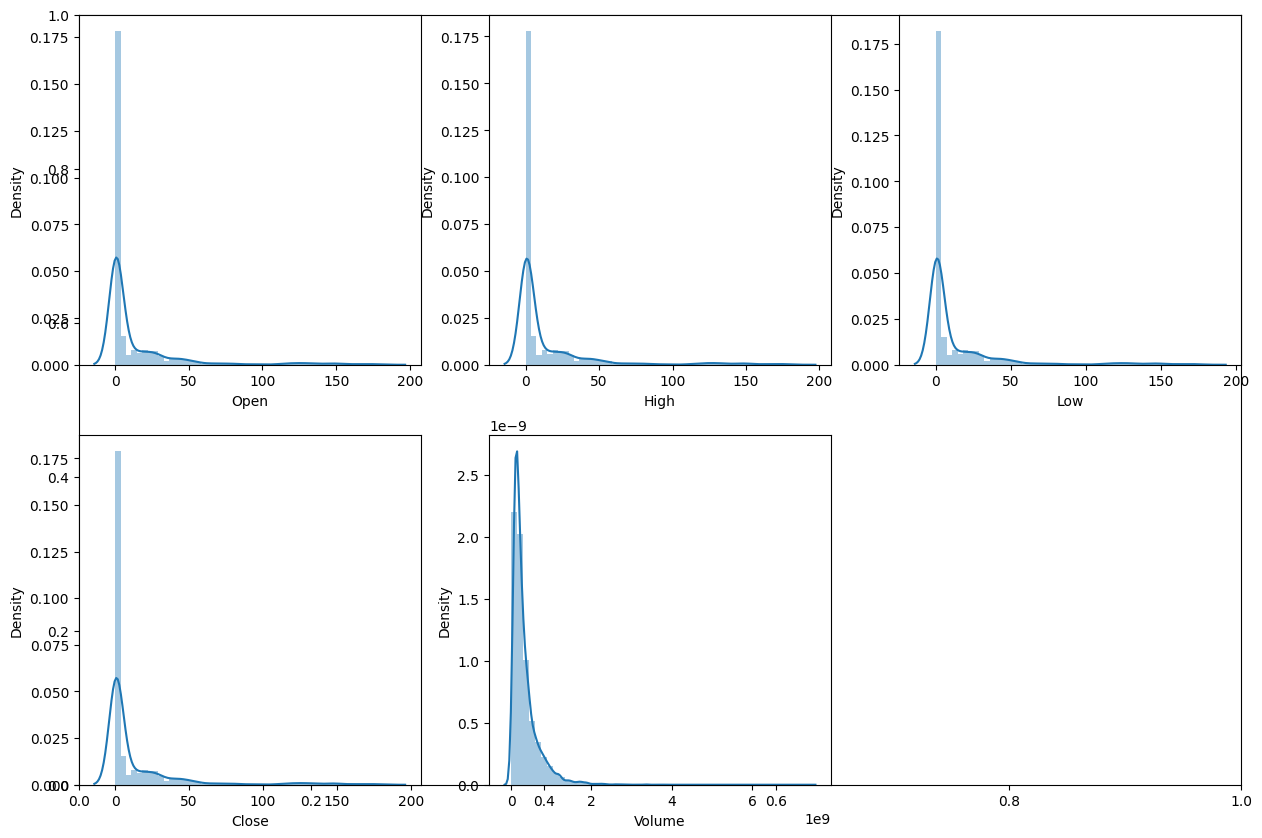

In [25]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(15,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()